In [1]:
import pandas  as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv", header=None)

In [3]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [4]:
test.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


In [5]:
sample.head()

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [7]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [8]:
train.shape

(207, 12)

In [9]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [10]:
train[train["week"]=="月"].sort_values(by="y", ascending=False)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
15,2013-12-9,165,月,1,ハンバーグデミソース,NaN,NaN,NaN,NaN,曇,--,9.1
20,2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3
10,2013-12-2,151,月,1,マーボ豆腐,NaN,NaN,NaN,NaN,快晴,--,13.8
46,2014-2-3,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,NaN,晴れ,--,15.9
51,2014-2-10,137,月,0,鶏の唐揚げおろしソース,423.0,NaN,NaN,1.0,曇,--,7.8
55,2014-2-17,137,月,1,チンジャオロース,416.0,NaN,NaN,NaN,晴れ,--,11.6
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
65,2014-3-3,131,月,0,ハンバーグカレーソース,407.0,NaN,NaN,NaN,曇,--,7.8
75,2014-3-17,129,月,0,鶏の唐揚げおろしソース,382.0,NaN,NaN,NaN,快晴,--,14.0
60,2014-2-24,129,月,1,ポークハヤシ,408.0,NaN,NaN,NaN,曇,--,6.6


In [11]:
train[train["week"]=="月"]["y"].mean()

94.05128205128206

In [12]:
train["kcal"] = train["kcal"].fillna(train["kcal"].mean())
test["kcal"] = test["kcal"].fillna(test["kcal"].mean())

In [13]:
train["remarks"].value_counts()

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
鶏のレモンペッパー焼（50食）、カレー（42食）     1
酢豚（28食）、カレー（85食）             1
手作りの味                        1
スペシャルメニュー（800円）              1
Name: remarks, dtype: int64

In [14]:
train["event"].value_counts()

ママの会             9
キャリアアップ支援セミナー    5
Name: event, dtype: int64

In [15]:
train["payday"].value_counts()

1.0    10
Name: payday, dtype: int64

In [16]:
pd.get_dummies(train["week"])

,月,木,水,火,金
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
202,0,0,1,0,0
203,0,1,0,0,0
204,0,0,0,0,1
205,1,0,0,0,0


In [17]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,404.409639,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,404.409639,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404.409639,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404.409639,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,404.409639,NaN,NaN,NaN,快晴,--,16.1


In [18]:
train.corr()

,y,soldout,kcal,payday,temperature
y,1.000000,0.098308,0.107327,NaN,-0.655332
soldout,0.098308,1.000000,0.043698,NaN,-0.156752
kcal,0.107327,0.043698,1.000000,NaN,-0.041905
payday,NaN,NaN,NaN,NaN,NaN
temperature,-0.655332,-0.156752,-0.041905,NaN,1.000000


In [19]:
trainX = pd.get_dummies(train[["kcal","temperature","week"]])
y = train["y"]

In [20]:
testX = pd.get_dummies(test[["kcal","temperature","week"]])

In [21]:
model1 = LR()

In [22]:
model1.fit(trainX,y)

LinearRegression()

In [23]:
model1.coef_

array([ 0.10671675, -2.52502479,  8.75796209, -9.38862844, -2.22852752,
        1.62644798,  1.23274589])

In [24]:
model1.intercept_

92.27498173674465

In [25]:
model1.score(trainX,y)

0.4678484679709446

In [26]:
pred = model1.predict(trainX)

In [27]:
from sklearn.metrics import mean_squared_error as MSE
print("RMSE",MSE(train["y"],pred)**0.5)

RMSE 23.92931336181989


In [28]:
train["pred"] = pred

In [29]:
train["delta"] = pred -train["y"]

In [30]:
train.sort_values(by="delta",ascending=False)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,pred,delta
54,2014-2-14,86,金,1,ロース甘味噌焼き,432.000000,NaN,NaN,NaN,雪,0.5,1.2,136.579336,50.579336
201,2014-9-22,29,月,0,筑前煮,395.000000,NaN,NaN,NaN,晴れ,--,25.2,79.555437,50.555437
69,2014-3-7,73,金,1,ボローニャ風カツ,396.000000,NaN,NaN,NaN,快晴,--,7.0,118.092389,45.092389
98,2014-4-18,56,金,1,鶏の味噌漬け焼き,325.000000,NaN,ママの会,NaN,曇,0,11.4,99.405390,43.405390
31,2014-1-10,87,金,0,手作りロースカツ,440.000000,NaN,NaN,1.0,快晴,--,5.1,127.585473,40.585473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2014-6-13,121,金,0,キーマカレー,404.409639,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,62.176780,-58.823220
8,2013-11-28,151,木,0,ハンバーグ,404.409639,NaN,NaN,NaN,薄曇,--,17.7,81.350699,-69.649301
174,2014-8-8,129,金,0,チキンカレー,404.409639,お楽しみメニュー,NaN,1.0,曇,--,31.1,58.136741,-70.863259
155,2014-7-11,124,金,0,ポークカレー,404.409639,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,51.066671,-72.933329


## Graph

<AxesSubplot:>

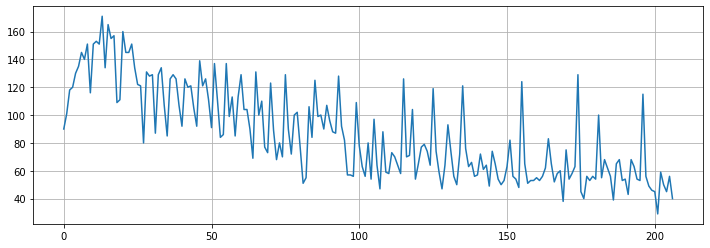

In [31]:
train["y"].plot(figsize=(12,4),grid=True, )

<AxesSubplot:xlabel='temperature', ylabel='y'>

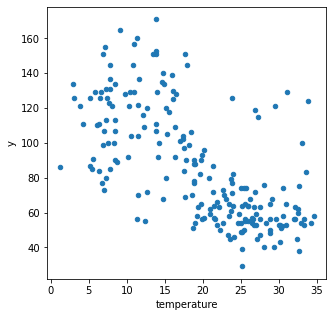

In [32]:
train[["y","temperature"]].plot.scatter(x="temperature", y="y",figsize=(5,5))

<AxesSubplot:xlabel='kcal', ylabel='y'>

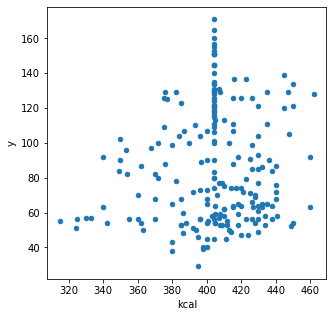

In [33]:
train[["y","kcal"]].plot.scatter(x="kcal", y="y",figsize=(5,5))

<AxesSubplot:title={'center':'y'}, xlabel='[week]'>

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 26376 missing from c

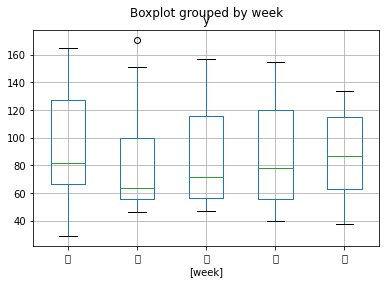

In [34]:
train[["y","week"]].boxplot(by="week")